In [1]:
# importing essential libs
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import datasets, linear_model
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Load the Diabetes dataset
columns = 'age sex bmi map tc ldl hdl tch ltg glu'.split() # Declare the columns names
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
df = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
y = diabetes.target # define the target variable (dependent variable) as y

In [3]:
df.head()

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [4]:
y[:5]

array([151.,  75., 141., 206., 135.])

In [5]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [6]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [7]:
model.score(X_test, y_test)

0.4526066021617381

Text(0, 0.5, 'Predictions')

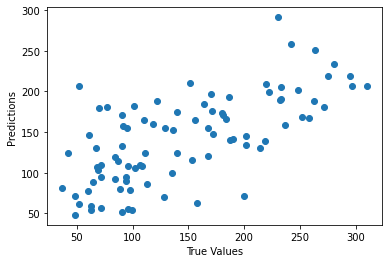

In [8]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [9]:
print ('Test RMSE:', np.sqrt(mean_squared_error(predictions, y_test)))
print ('Train RMSE:', np.sqrt(mean_squared_error(lm.predict(X_train), y_train)))

Test RMSE: 53.853256984914395
Train RMSE: 53.55881425327268


# Feature Scaling

In [10]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
  
# Read Data from CSV 
data = pd.read_csv('regression.csv') 
data.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Position,Jersey Number,Contract Valid Until,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,€565K,RF,10.0,2021,5'7,159lbs
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,€405K,ST,7.0,2022,6'2,183lbs
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,€290K,LW,10.0,2022,5'9,150lbs
3,De Gea,27,Spain,91,93,Manchester United,72000000.0,€260K,GK,1.0,2020,6'4,168lbs
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,€355K,RCM,7.0,2023,5'11,154lbs


In [11]:
y = data['Value']

In [12]:
data = data.drop(['Name', 'Nationality', 'Club', 'Wage', 'Position', 'Weight', 'Height', 'Contract Valid Until', 'Value'], axis = 1)

In [13]:
data.head()

,Age,Overall,Potential,Jersey Number
0,31,94,94,10.0
1,33,94,94,7.0
2,26,92,93,10.0
3,27,91,93,1.0
4,27,91,92,7.0


In [14]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2)

#### MinMaxScaler

In [15]:
# Initialise the Scaler and Fit
norm = MinMaxScaler().fit(X_train)

In [16]:
X_train = pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))

In [17]:
X_train

,Age,Overall,Potential,Jersey Number
0,0.344828,0.541667,0.531915,0.061224
1,0.137931,0.416667,0.574468,0.081633
2,0.172414,0.395833,0.574468,0.204082
3,0.137931,0.208333,0.468085,0.295918
4,0.103448,0.166667,0.382979,0.357143
...,...,...,...,...
14320,0.068966,0.166667,0.297872,0.295918
14321,0.655172,0.479167,0.446809,0.122449
14322,0.275862,0.520833,0.638298,0.091837
14323,0.206897,0.187500,0.297872,0.295918


In [18]:
X_test = pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))

In [19]:
X_test

,Age,Overall,Potential,Jersey Number
0,0.137931,0.250000,0.425532,0.265306
1,0.137931,0.166667,0.382979,0.224490
2,0.310345,0.500000,0.531915,0.265306
3,0.103448,0.416667,0.680851,0.285714
4,0.241379,0.479167,0.617021,0.704082
...,...,...,...,...
3577,0.206897,0.250000,0.361702,0.255102
3578,0.586207,0.416667,0.382979,0.102041
3579,0.379310,0.645833,0.638298,0.122449
3580,0.379310,0.395833,0.382979,0.112245


### Standard Scaler

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
# Initialise the Scaler and Fit
norm = StandardScaler().fit(X_train)

In [22]:
X_train  = pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))

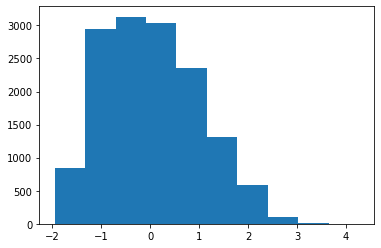

In [23]:
plt.hist(X_train.Age)
plt.show()

In [24]:
pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))

,Age,Overall,Potential,Jersey Number
0,-1.092671,-1.179777,-0.539536,0.458975
1,-1.092671,-1.752867,-0.863692,0.209321
2,-0.020302,0.539495,0.270854,0.458975
3,-1.307145,-0.033595,1.405400,0.583801
4,-0.449250,0.396223,0.919166,3.142750
...,...,...,...,...
3577,-0.663724,-1.179777,-1.025770,0.396561
3578,1.695489,-0.033595,-0.863692,-0.539639
3579,0.408646,1.542404,1.081244,-0.414813
3580,0.408646,-0.176868,-0.863692,-0.477226


# tasks

###### try applying this scalers to any dataset and check the regression results

In [25]:
# Load the Diabetes dataset
columns = 'age sex bmi map tc ldl hdl tch ltg glu'.split() # Declare the columns names
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
df = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
y = diabetes.target # define the target variable (dependent variable) as y

In [26]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

In [27]:
# Initialise the Scaler and Fit
norm = MinMaxScaler().fit(X_train)

In [28]:
X_train = pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))
X_train

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
0,0.816667,1.0,0.405172,0.690141,0.544503,0.524900,0.220779,0.423131,0.590940,0.500000
1,0.450000,1.0,0.284483,0.323944,0.335079,0.406375,0.103896,0.564175,0.486602,0.575758
2,0.516667,0.0,0.556034,0.859155,0.356021,0.315737,0.337662,0.282087,0.551161,0.454545
3,0.366667,0.0,0.215517,0.338028,0.198953,0.181275,0.467532,0.141044,0.293531,0.030303
4,0.383333,0.0,0.094828,0.126761,0.267016,0.197211,0.571429,0.000000,0.342589,0.348485
...,...,...,...,...,...,...,...,...,...,...
348,0.050000,0.0,0.051724,0.281690,0.240838,0.256972,0.389610,0.141044,0.256548,0.196970
349,0.516667,1.0,0.478448,0.802817,0.272251,0.217131,0.415584,0.141044,0.518828,0.560606
350,0.633333,0.0,0.275862,0.436620,0.397906,0.273904,0.636364,0.141044,0.443568,0.500000
351,0.433333,0.0,0.262931,0.295775,0.350785,0.382470,0.298701,0.282087,0.337464,0.363636


In [29]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
X_test = pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))
predictions = lm.predict(X_test)

In [30]:
model.score(X_test, y_test)

0.45260660216173776

In [31]:
print ('Test RMSE:', np.sqrt(mean_squared_error(predictions, y_test)))
print ('Train RMSE:', np.sqrt(mean_squared_error(lm.predict(X_train), y_train)))

Test RMSE: 53.85325698491441
Train RMSE: 53.55881425327268


In [32]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

In [33]:
# Initialise the Scaler and Fit
norm = StandardScaler().fit(X_train)

In [34]:
X_train = pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))
X_train

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
0,1.498365,1.061370,0.219902,1.138877,0.728473,1.055893,-0.824451,0.711038,0.547560,-0.061449
1,-0.228858,1.061370,-0.419366,-0.710597,-0.424929,0.272425,-1.529791,1.484286,-0.019776,0.367236
2,0.085182,-0.942179,1.018987,1.992480,-0.309589,-0.326699,-0.119111,-0.062210,0.331260,-0.318660
3,-0.621409,-0.942179,-0.784662,-0.639464,-1.174640,-1.215508,0.664600,-0.835458,-1.069599,-2.719299
4,-0.542899,-0.942179,-1.423930,-1.706468,-0.799784,-1.110167,1.291569,-1.608706,-0.802848,-0.918820
...,...,...,...,...,...,...,...,...,...,...
348,-2.113102,-0.942179,-1.652240,-0.923998,-0.943960,-0.715141,0.194374,-0.835458,-1.270691,-1.776191
349,0.085182,1.061370,0.608029,1.707946,-0.770949,-0.978492,0.351116,-0.835458,0.155448,0.281499
350,0.634754,-0.942179,-0.465028,-0.141528,-0.078908,-0.603217,1.683425,-0.835458,-0.253776,-0.061449
351,-0.307368,-0.942179,-0.533521,-0.852865,-0.338424,0.114414,-0.354224,-0.062210,-0.830712,-0.833083


In [35]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
X_test = pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))
predictions = lm.predict(X_test)

In [36]:
model.score(X_test, y_test)

0.452606602161738

In [37]:
print ('Test RMSE:', np.sqrt(mean_squared_error(predictions, y_test)))
print ('Train RMSE:', np.sqrt(mean_squared_error(lm.predict(X_train), y_train)))

Test RMSE: 53.8532569849144
Train RMSE: 53.55881425327268


# One Hot Encoding

In [38]:
# Read Data from CSV 
data = pd.read_csv('regression.csv') 
data.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Position,Jersey Number,Contract Valid Until,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,€565K,RF,10.0,2021,5'7,159lbs
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,€405K,ST,7.0,2022,6'2,183lbs
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,€290K,LW,10.0,2022,5'9,150lbs
3,De Gea,27,Spain,91,93,Manchester United,72000000.0,€260K,GK,1.0,2020,6'4,168lbs
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,€355K,RCM,7.0,2023,5'11,154lbs


In [39]:
pd.get_dummies(data[['Position']])

,Position_CAM,Position_CB,Position_CDM,Position_CF,Position_CM,Position_GK,Position_LAM,Position_LB,Position_LCB,Position_LCM,...,Position_RB,Position_RCB,Position_RCM,Position_RDM,Position_RF,Position_RM,Position_RS,Position_RW,Position_RWB,Position_ST
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17902,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17903,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
17904,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
17905,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# tasks

###### try applying this scalers to any column(s) and check the regression results

In [40]:
data = pd.read_csv('regression.csv') 
data.head() 

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Position,Jersey Number,Contract Valid Until,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,€565K,RF,10.0,2021,5'7,159lbs
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,€405K,ST,7.0,2022,6'2,183lbs
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,€290K,LW,10.0,2022,5'9,150lbs
3,De Gea,27,Spain,91,93,Manchester United,72000000.0,€260K,GK,1.0,2020,6'4,168lbs
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,€355K,RCM,7.0,2023,5'11,154lbs


In [41]:
y = data.Value
data = data.drop(['Name', 'Nationality', 'Club', 'Wage', 'Position', 'Contract Valid Until', 'Height', 'Weight', 'Value'], axis = 1)

In [42]:
data.head()

,Age,Overall,Potential,Jersey Number
0,31,94,94,10.0
1,33,94,94,7.0
2,26,92,93,10.0
3,27,91,93,1.0
4,27,91,92,7.0


In [43]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)

In [44]:
norm = MinMaxScaler().fit(X_train)

In [45]:
X_train = pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))
X_train

,Age,Overall,Potential,Jersey Number
0,0.230769,0.541667,0.723404,0.214286
1,0.500000,0.229167,0.191489,0.142857
2,0.461538,0.437500,0.404255,0.173469
3,0.423077,0.333333,0.297872,0.193878
4,0.423077,0.416667,0.382979,0.204082
...,...,...,...,...
14320,0.615385,0.375000,0.340426,0.112245
14321,0.423077,0.354167,0.319149,0.061224
14322,0.384615,0.500000,0.468085,0.132653
14323,0.384615,0.666667,0.680851,0.867347


In [46]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
X_test = pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))
predictions = lm.predict(X_test)

In [47]:
model.score(X_test, y_test)

0.4499045750576577

In [48]:
print ('Test RMSE:', np.sqrt(mean_squared_error(predictions, y_test)))
print ('Train RMSE:', np.sqrt(mean_squared_error(lm.predict(X_train), y_train)))

Test RMSE: 4332536.175036151
Train RMSE: 4108467.718850979


In [49]:
data = pd.read_csv('regression.csv') 
y = data.Value
data = data.drop(['Name', 'Nationality', 'Club', 
                  'Wage', 'Position', 'Contract Valid Until', 
                  'Height', 'Weight', 'Value'], axis = 1)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)

In [51]:
norm = StandardScaler().fit(X_train)

In [52]:
X_train = pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))

In [53]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
X_test = pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))
predictions = lm.predict(X_test)

In [54]:
model.score(X_test, y_test)

0.4499045750576579

In [55]:
print ('Test RMSE:', np.sqrt(mean_squared_error(predictions, y_test)))
print ('Train RMSE:', np.sqrt(mean_squared_error(lm.predict(X_train), y_train)))

Test RMSE: 4332536.17503615
Train RMSE: 4108467.718850979


## Outliers


In [56]:
import numpy as np
import matplotlib.pyplot as plt


# multiply and add by random numbers to get some real values
data = np.random.randn(50000)  * 20 + 20

# Function to Detection Outlier on one-dimentional datasets.
def find_anomalies(data):
    #define a list to accumlate anomalies
    anomalies = []
    
    # Set upper and lower limit to 3 standard deviation
    data_std = np.std(data)
    data_mean = np.mean(data)
    anomaly_cut_off = data_std * 3
    
    lower_limit  = data_mean - anomaly_cut_off 
    upper_limit = data_mean + anomaly_cut_off
    # Generate outliers
    for outlier in data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return anomalies, lower_limit, upper_limit

anomalies, lower, upper = find_anomalies(data)

<function matplotlib.pyplot.show(close=None, block=None)>

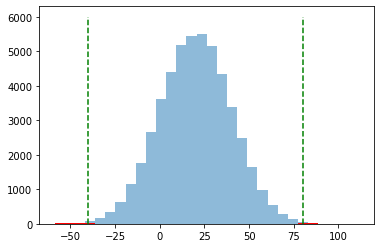

In [57]:
plt.hist(data, alpha =0.5, bins = 30)
plt.hist(anomalies, color ="r", bins = 30)
plt.vlines(lower, 0, 6000, linestyles="dashed", color = "g")
plt.vlines(upper, 0, 6000, linestyles="dashed", color = "g")

plt.show

<AxesSubplot:>

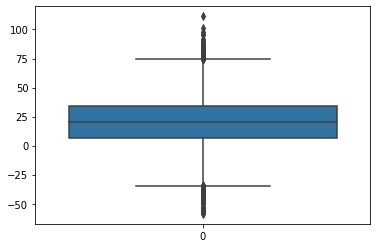

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=data)